In [1]:
import pandas as pd

df = pd.read_csv('processed_dataset_v2.csv')

In [6]:
X = df.drop(columns=['impaye'])
y = df['impaye']

In [7]:
df['impaye'].value_counts()

,count
impaye,
0,41316
1,8225


In [8]:
from sklearn.preprocessing import LabelEncoder

for col in X.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


model = xgb.XGBClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Accuracy: 0.9587243919668987
AUC: 0.984886180069853

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      8264
           1       0.92      0.82      0.87      1645

    accuracy                           0.96      9909
   macro avg       0.94      0.90      0.92      9909
weighted avg       0.96      0.96      0.96      9909



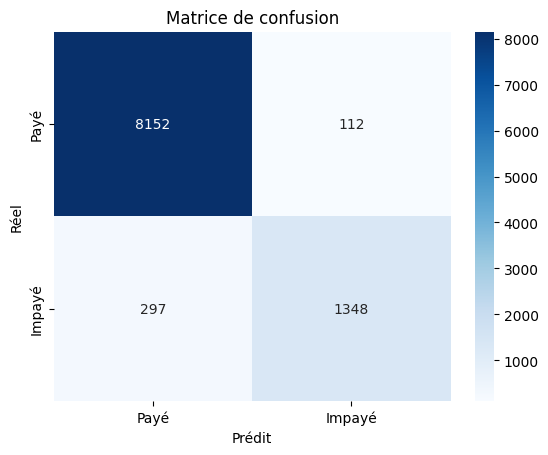

In [11]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Probabilités (entre 0 et 1)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Payé", "Impayé"], yticklabels=["Payé", "Impayé"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()



In [12]:
!pip install lightgbm
import lightgbm as lgb

# Initialiser le modèle LightGBM
model = lgb.LGBMClassifier(random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6580, number of negative: 33052
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2984
[LightGBM] [Info] Number of data points in the train set: 39632, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166027 -> initscore=-1.614047
[LightGBM] [Info] Start training from score -1.614047


LGBMClassifier(random_state=42)

Accuracy: 0.9433848016954284
AUC: 0.9737726087736902

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8264
           1       0.91      0.73      0.81      1645

    accuracy                           0.94      9909
   macro avg       0.93      0.86      0.89      9909
weighted avg       0.94      0.94      0.94      9909



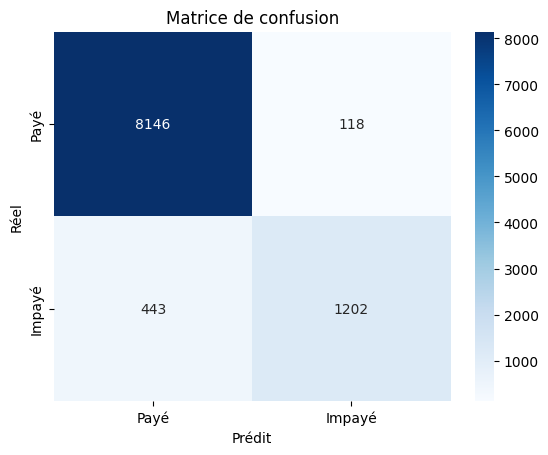

In [13]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Probabilités (entre 0 et 1)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Payé", "Impayé"], yticklabels=["Payé", "Impayé"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()



In [14]:
!pip install catboost
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    verbose=0,
    random_state=42
)

model.fit(X_train, y_train)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.0 MB/s eta 0:00:00


Accuracy: 0.9531738823291956
AUC: 0.9789482046860887

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      8264
           1       0.92      0.79      0.85      1645

    accuracy                           0.95      9909
   macro avg       0.94      0.89      0.91      9909
weighted avg       0.95      0.95      0.95      9909



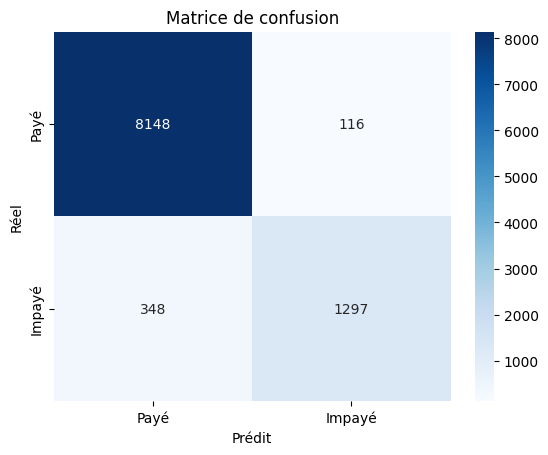

In [15]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Probabilités (entre 0 et 1)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Payé", "Impayé"], yticklabels=["Payé", "Impayé"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()



In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

Accuracy: 0.8542738924210314
AUC: 0.7942959465304524

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8264
           1       0.71      0.20      0.32      1645

    accuracy                           0.85      9909
   macro avg       0.79      0.59      0.62      9909
weighted avg       0.84      0.85      0.82      9909



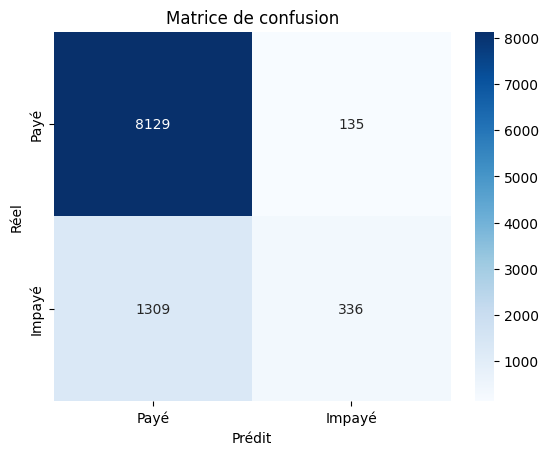

In [17]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Probabilités (entre 0 et 1)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Payé", "Impayé"], yticklabels=["Payé", "Impayé"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()



In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.9683116358865678
AUC: 0.9909926454361687

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      8264
           1       0.95      0.85      0.90      1645

    accuracy                           0.97      9909
   macro avg       0.96      0.92      0.94      9909
weighted avg       0.97      0.97      0.97      9909



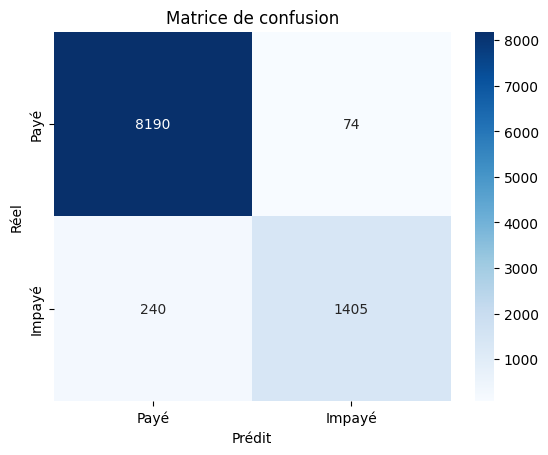

In [19]:
# Prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Probabilités (entre 0 et 1)
y_proba = model.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Payé", "Impayé"], yticklabels=["Payé", "Impayé"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

